# Capstone Webscrapping using BeautifulSoup

This notebook contains guidances & tasks on the data processing for the application

## background

At this project we try to scrap movie data release in 2021 from IMDB website. IMDB is an online database of information related to films, television series, home videos, video games, and streaming content online – including cast, production crew and personal biographies, plot summaries, trivia, ratings, and fan and critical reviews

A lot of you might ask why we need to scrap this data from the sites while it already have a good enough visualisation because we want to find new insights from a data

We will scrap 4 points from this sites
1. Film title
2. IMDB Rating : IMDB rating are on a scale from 1 - 10. 1 meaning the title was terrible and one of the worst titles you've seen and 10 meaning you think it was excellent.
3. vote : number of people who gave ratings
4. Metascore : Metascore is considered the rating of a film. Scores are assigned to movie's reviews of large group of the world's most respected critics, and weighted average are applied to summarize their opinions range.

## Requesting the Data and Creating a BeautifulSoup

Let's begin with requesting the web from the site with `get` method.

In [95]:
pip install -r requirements.txt

In [77]:
import requests

url_get = requests.get('https://www.imdb.com/search/title/?release_date=2021-01-01,2021-12-31')

To visualize what exactly you get from the `request.get`, we can use .content so ee what we exactly get, in here i slice it so it won't make our screen full of the html we get from the page. You can delete the slicing if you want to see what we fully get.

In [78]:
url_get.content[1:500]

b'\n<!DOCTYPE html>\n<html\n    xmlns:og="http://ogp.me/ns#"\n    xmlns:fb="http://www.facebook.com/2008/fbml">\n    <head>\n         \n\n        <meta charset="utf-8">\n        <meta http-equiv="X-UA-Compatible" content="IE=edge">\n\n\n\n\n        <script type="text/javascript">var IMDbTimer={starttime: new Date().getTime(),pt:\'java\'};</script>\n\n<script>\n    if (typeof uet == \'function\') {\n      uet("bb", "LoadTitle", {wb: 1});\n    }\n</script>\n  <script>(function(t){ (t.events = t.events || {})["csm_head_pre_'

As we can see we get a very unstructured and complex html, which actually contains the codes needed to show the webpages on your web browser. But we as human still confused what and where we can use that piece of code, so here where we use the beautifulsoup. Beautiful soup class will result a beautifulsoup object. Beautiful Soup transforms a complex HTML document into a complex tree of Python objects. 

Let's make Beautiful soup object and feel free to explore the object here.

In [79]:
from bs4 import BeautifulSoup 

soup = BeautifulSoup(url_get.content,"html.parser")

## Finding the right key to scrap the data & Extracting the right information

Find the key and put the key into the `.find()` Put all the exploring the right key at this cell. (please change this markdown with your explanation)

In [80]:
table = soup.find("div", attrs={"class":"lister-item mode-advanced"})
print(table.prettify()[1:500])

div class="lister-item mode-advanced">
 <div class="lister-top-right">
  <div class="ribbonize" data-caller="filmosearch" data-tconst="tt12851524">
  </div>
 </div>
 <div class="lister-item-image float-left">
  <a href="/title/tt12851524/">
   <img alt="Only Murders in the Building" class="loadlate" data-tconst="tt12851524" height="98" loadlate="https://m.media-amazon.com/images/M/MV5BZTFmZWUwZmEtYzc4Ni00N2FmLTk1MmMtZmMyODYwZTNkY2EwXkEyXkFqcGdeQXVyMTM1MTE1NDMx._V1_UY98_CR5,0,67,98_AL_.jpg" src=


Finding row length.

In [81]:
table = soup.findAll("div", attrs={"class":"lister-item mode-advanced"})
row_length = len(table)
row_length

50

Do the scrapping process here (please change this markdown with your explanation)

In [82]:
temp = [] #initiating a tuple
for store in table:
    #get movie name
    movie_name = store.h3.a.text
    
    #get rating
    rating = store.find("div", class_="inline-block ratings-imdb-rating").text.replace("\n", "")
    
    #get metascore
    metascore = store.find("span", class_="metascore").text.replace(" ","") if store.find("span", class_="metascore") else "00"
    
    #get vote
    value=store.find_all('span',attrs={"name":"nv"})
    vote=value[0].text
    
    #get gross
    gross=value[1].text if len(value) >1 else '00,00'
    
    temp.append((movie_name,rating,metascore,vote,gross))
    
temp 

[('Only Murders in the Building', '8.1', '00', '74,021', '00,00'),
 ('The Black Phone', '7.3', '65', '24,956', '00,00'),
 ('Sing 2', '7.4', '49', '55,945', '$162.79M'),
 ('Last Night in Soho', '7.1', '65', '113,809', '00,00'),
 ('House of Gucci', '6.6', '59', '111,290', '00,00'),
 ('Spider-Man: No Way Home', '8.3', '71', '674,430', '$804.75M'),
 ('1883', '8.8', '00', '56,202', '00,00'),
 ('No Time to Die', '7.3', '68', '373,570', '$160.87M'),
 ('Dune: Part One', '8.0', '74', '588,478', '$108.33M'),
 ('Ghostbusters: Afterlife', '7.1', '45', '162,241', '00,00'),
 ('Hacks', '8.2', '00', '25,235', '00,00'),
 ('Pleasure', '6.3', '75', '12,280', '00,00'),
 ('Eternals', '6.3', '52', '318,878', '$164.87M'),
 ('Superman & Lois', '7.8', '00', '30,602', '00,00'),
 ('Free Guy', '7.1', '62', '349,133', '$121.63M'),
 ('The Book of Boba Fett', '7.3', '00', '134,225', '00,00'),
 ('Operation Mincemeat', '6.6', '65', '17,735', '00,00'),
 ('Old', '5.8', '55', '109,593', '00,00'),
 ('WandaVision', '7.9', 

## Creating data frame & Data wrangling

Put the array into dataframe

In [83]:
import pandas as pd

In [84]:
#50 Film populer yang dirilis tahun 2021
df = pd.DataFrame(temp, columns = ("movie_name","rating","metascore","vote","gross")).iloc[0:7 , 0:4]
df

,movie_name,rating,metascore,vote
0,Only Murders in the Building,8.1,00,"74,021"
1,The Black Phone,7.3,65,"24,956"
2,Sing 2,7.4,49,"55,945"
3,Last Night in Soho,7.1,65,"113,809"
4,House of Gucci,6.6,59,"111,290"
5,Spider-Man: No Way Home,8.3,71,"674,430"
6,1883,8.8,00,"56,202"


Do the data cleaning here (please change this markdown with your explanation of what you do for data wrangling)

**Dari datafrane IMDB diatas kita perlu melakukan cek terhadap tipe datanya, untuk dapat kemudian dilakukan analisa
Jika terdapat tipe data yang belum sesuai maka perlu disesuaikan terlebih dahulu, dengan cara sebagai berikut:**

In [85]:
df.dtypes #cek tipe data

movie_name    object
rating        object
metascore     object
vote          object
dtype: object

In [86]:
df["rating"]=df["rating"].astype("float64") #mengubah tipe data
df["metascore"]=df["metascore"].astype("int64")
df["vote"]=df["vote"].str.replace(",","") #melakukan adjustment agar data bisa diubah menjadi tipe int
df["vote"]=df["vote"].astype("int64")
df.dtypes

movie_name     object
rating        float64
metascore       int64
vote            int64
dtype: object

Data visualisation (please change this markdown with your explanation of what you do for data wrangling)

In [91]:
#7 film paling populer yang dirilis tahun 2021
df=df.head(7)
df=df.set_index("movie_name")
df

,rating,metascore,vote
movie_name,,,
Only Murders in the Building,8.1,0,74021
The Black Phone,7.3,65,24956
Sing 2,7.4,49,55945
Last Night in Soho,7.1,65,113809
House of Gucci,6.6,59,111290
Spider-Man: No Way Home,8.3,71,674430
1883,8.8,0,56202


In [92]:
df.describe()

,rating,metascore,vote
count,7.000000,7.000000,7.000000
mean,7.657143,44.142857,158664.714286
std,0.767805,30.910778,229623.878974
min,6.600000,0.000000,24956.000000
25%,7.200000,24.500000,56073.500000
50%,7.400000,59.000000,74021.000000
75%,8.200000,65.000000,112549.500000
max,8.800000,71.000000,674430.000000


<AxesSubplot:ylabel='movie_name'>

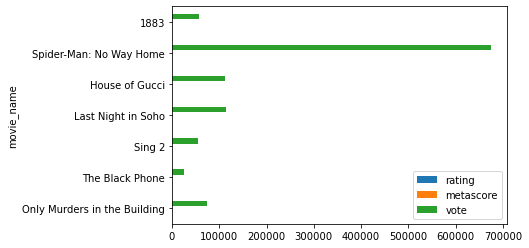

In [93]:
df.plot.barh() #membuat visualisasi data 

<AxesSubplot:ylabel='movie_name'>

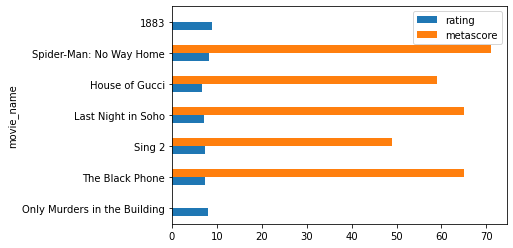

In [94]:
Grafik1 = df.iloc[0:7 , 0:2]
Grafik1.plot.barh()

<AxesSubplot:xlabel='movie_name'>

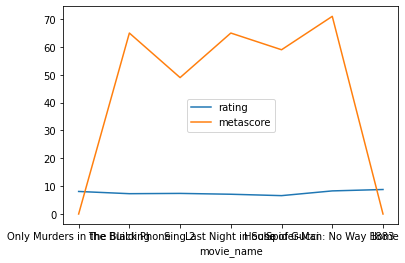

In [96]:
Grafik1.plot()

### Implementing your webscrapping to the flask dashboard

- Copy paste all of your web scrapping process to the desired position on the `app.py`
- Changing the title of the dasboard at `index.html`

## Finishing This Notebook with Your Analysis and Conclusion

First you can do start with making the data visualisation. 

In [ ]:
#Insight:
    #1. Film yang menjadi favorit penonton tidak selalu mempunyai nilai metascore yang tinggi dari kritikus film
    #2. Film bertema superhero (Spider-Man: No Way Home) mempunyai lebih banyak voters dibandingkan film yang lain
    #3. Rata2 ratings dari 7 film populer diatas adalah 7,6


(Put your analysis and conclusion here.)

### Extra Challange

This will be not included to the scoring. 

- You can create additional analysis from the data.
- Implement it to the dashboard with at `app.py` dan `index.html`.